# Homework 3

**PLEASE SUBMIT YOUR SOLUTION AS A SINGLE JUPYTER NOTEBOOK**

> Bonus Questions are not mandatory and are not graded. They are only there for the interested ones to play with. 

## Question 1: Recursion and Plot
Recursion is a very powerful tool in numerical algorithms, where one calls the same function inside the definition of the function. It is very important to ensure a stop case. Otherwise your program might go into an infinite loop. For example, a simple recursive function to calculate factorial of a number is as follows

In [ ]:
def factorial_recursive(n):
    if n==1: # stop condition !IMPORTANT!
        return 1
    return n*factorial_recursive(n-1)

Write a recursive function to calculate $n^{\rm th}$ Fibonacci number. Fibonacci numbers $1,1,2,3,5,8, \cdots$ are defined by the recursion relation $F_{n+2} = F_{n+1} + F_n$. 

In [12]:
def fibonacci(n):
    #your code here. (remove the line  with `pass`)
    if n == 1 or n ==2: return 1
    return fibonacci(n-1) + fibonacci(n-2)
    

def fibonacci_lazy():
  a, b = 0, 1
  while True:
    yield a
    a, b = b, a + b

def fibonacci_my(n):
    fibb = fibonacci_lazy()
    for _ in range(n):
        next(fibb)
    return next(fibb)

n = 50
#print(fibonacci(n))
print(fibonacci_my(n))

12586269025


> **Bonus Question:** This implimentation of fibonacci sequence is not the best. Why? Can you improve it? Hint: read about memoization. That's not a typo :)

Choose a number $N$ greater than 5. Collect first $N$ Fibonacci ratios in a list. Fibinacci ration $R_n = \frac{F_{n+1}}{F_n}$.

In [19]:
N = 5000
fibonacci_ratio_list = [fibonacci_my(x+1)/fibonacci_my(x) for x in range(1,N)] # could do similar lazy valuation as with fibonnaci itself

Here I include the code to plot the ratios. They should converge to the dotted line.

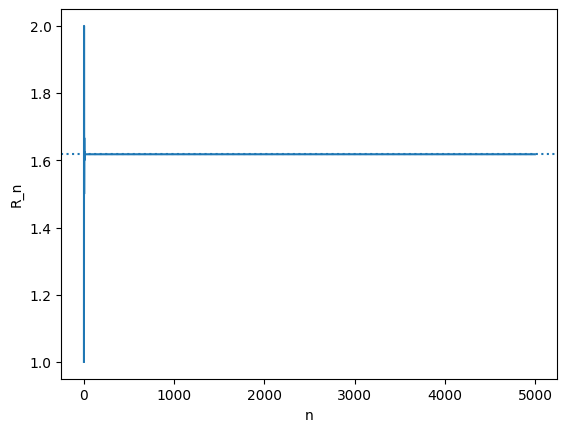

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(fibonacci_ratio_list)
plt.axhline(y=(1 + np.sqrt(5))/2, linestyle="dotted")
# Google how to add axis labels and add them here. 
plt.xlabel("n")
plt.ylabel("R_n")
plt.show()

Consider the quadratic equation 
$$x^2 - x-1 = 0$$
One can write the equation in this alternate form $x = 1 + \frac{1}{x}$ and obtain a recursion relation,
$$x_{n+1} = 1 + \frac{1}{x_n}$$
$x_n$ converges to the positive root of the equation. 

> **Bonus Question:** Why only the positive root? Is it true for more complicated equations e.g. $x^5 + 3x^2 - 4x + 1 = 0$? Can you think of extending this algorithm to find the other real roots as well (if they exist!)?

Write a recursive function (with initial guess as the argument ) to implement this. Compare it with the analytical value.
Keep track of how the initial value evolves i.e. create a list of $x_i$'s. (hint, modify the previous function to write each value to an array).

In [21]:
def recursive_root(initial_guess):
    x_n = initial_guess
    while True:
        yield x_n
        x_n = 1 + 1/x_n

In [37]:
def recursive_root_N(initial_guess, N):
    gen = recursive_root(initial_guess)
    for _ in range(N):
        next(gen)
    return next(gen)

recursive_root_N(1, 100)

1.618033988749895

In [38]:
def list_recursive_root(initial_guess, N):
    gen = recursive_root(initial_guess)
    return [next(gen) for _ in range(N)]

print(list_recursive_root(1,10))

[1, 2.0, 1.5, 1.6666666666666665, 1.6, 1.625, 1.6153846153846154, 1.619047619047619, 1.6176470588235294, 1.6181818181818182]


In [48]:
guess = -0.51 # this value will throw an error. Why? Change it to a different value of your choice.
# -0.5 throws an error becouse of division by zero
N = 100
series_root = list_recursive_root(guess, N)

plot this along with the previous figure. 

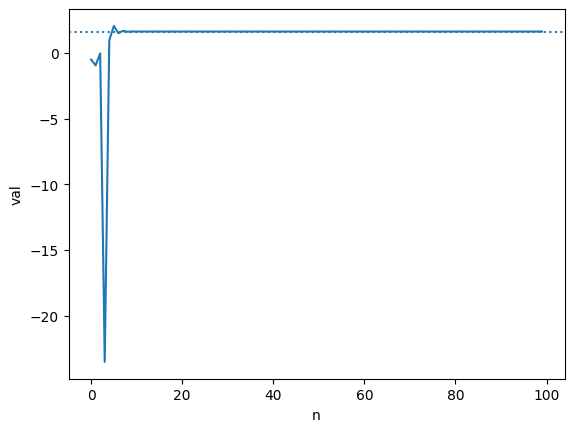

In [49]:
# plotting code here. Similar to the code above
import matplotlib.pyplot as plt
import numpy as np
plt.plot(series_root)
plt.axhline(y=(1 + np.sqrt(5))/2, linestyle="dotted")
plt.xlabel("n")
plt.ylabel("val")
plt.show()

The value that both the above lists converge to, is called the golden ratio. Read more about it on Wikipedia. 

Now that you have mastered plotting, lets plot the golden spiral.

## Question 2: The power of libraries

Write a function, which takes two matrices and return their matrix product by only using plain Python. **No libraries are allowed at this point.**

In [103]:
#### your function goes here
def matrix_product(A, B):

    # requirements
    if len(A[0]) != len(B): return -1

    def sum(i, j):
        res = 0
        for k in range(len(A[0])):
            res += A[i][k] * B[k][j]
        return res

    m = len(A) 
    p = len(B[0])

    return [ [ sum(i,j)  for j in range(0,p)] for i in range(0,m) ]



In [104]:
A = [[1,-1, 2],[0,-2, 1]]
B = [[1,0,1,1],[2,0,1,-1],[3,1,0,2]]
matrix_product(A, B)

[[5, 2, 0, 6], [-1, 1, -2, 4]]

To check if it works fine, you can generate test matrices

In [78]:
def testmatrix(n, shift=0):
    return [ [ i + shift for i in range((n+1)*j+1,(n+1)*(j+1))] for j in range(0,n) ]

like 

In [113]:
matrix_product(testmatrix(3, 1),testmatrix(3, -6))

[[-1, 8, 17], [-13, 8, 29], [-25, 8, 41]]

Finally, your code for different matrices sizes and compare it to the same operation by using the numpy libarary. Plot the timing of both for different sizes of the matrix and explain what you are finding. *Hint: To take the time who long a bit of code needs to be executed, you can use the following code fragment:*

In [80]:
import time
start_time = time.time()
testmatrix(100,1)
print("Generating of a 100x100 test matrix took %s seconds on your computer" % (time.time() - start_time))

Generating of a 100x100 test matrix took 0.0010001659393310547 seconds on your computer


In [118]:
import numpy as np
if np.dot(A,B).tolist() == matrix_product(A, B): print("Results are the same!")

Results are the same!


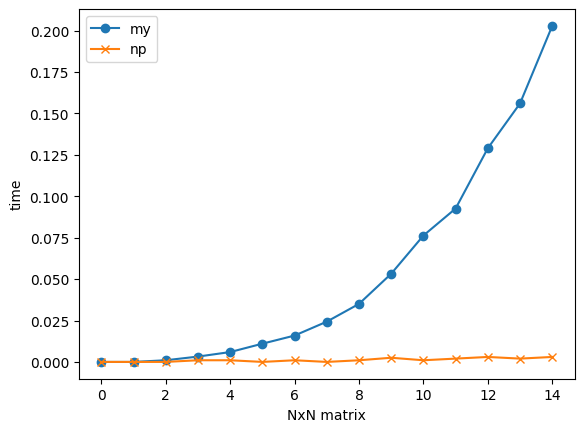

In [139]:
n = 2
N = 150
step = 10
time_my = []
time_np = []
for i in range(n, N, step):
    
    A = testmatrix(i,1)
    B = testmatrix(i,1)

    start_time = time.time()
    matrix_product(A, B)
    time_my.append(time.time() - start_time)

    start_time = time.time()
    np.dot(A, B)
    time_np.append(time.time() - start_time)

plt.plot(time_my, "-o", label="my")
plt.plot(time_np, "-x", label="np")
plt.xlabel("NxN matrix")
plt.ylabel("time")
plt.legend()
plt.show()